# Stock Analysis   

This part will contain the stocks' analysis. It will be used to create the different financial offers.   

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore') 

import yahoofinancials 
from yahoofinancials import YahooFinancials

# Importing Data

## Example

It is possible to use the "yahoofinancials" library to get stock data.  
In the following cell is reported an example of how to use it. 

In [2]:
ticker = 'AAPL'

apple = YahooFinancials(ticker)  

apple_stats = pd.DataFrame(apple.get_historical_price_data(start_date = '2022-04-14', end_date='2023-04-14', time_interval='weekly')).loc['prices', 'AAPL']

apple_df = pd.DataFrame(apple_stats).drop(columns='date') 

apple_df['Company'] = ticker

apple_df.head()


,high,low,open,close,volume,adjclose,formatted_date,Company
0,171.270004,165.039993,167.389999,165.289993,145948300,164.294739,2022-04-11,AAPL
1,171.529999,161.500000,163.919998,161.789993,376787700,160.815811,2022-04-18,AAPL
2,166.199997,155.380005,161.119995,157.649994,541697200,156.700729,2022-04-25,AAPL
3,166.479996,153.270004,156.710007,157.279999,566928200,156.332993,2022-05-02,AAPL
4,156.740005,138.800003,154.929993,147.110001,686227300,146.439056,2022-05-09,AAPL


Checking the shape.

In [3]:
apple_df.shape

(53, 8)

It contains 53 rows, one row per week.  
As it is possible to see, this process returns all the information about the company's stocks.  
The column "Company" was added to provide further information and to avoid making confusion when more companies will be considered.  

## Creating the Dataframe

In [10]:
tickers = ['AAPL', 'MSFT', 'IBM', 'SAP', 'CRM', 'ACN', 'INTC', 'UBER', 'TSM', 'ORCL',
           'GS', 'BLK', 'JPM', 'DB', 'SAN', 'HSBC', 'WFC', 'SPGI', 'UBS', 'ING', 
           'E', 'SHEL', 'NGG', 'EIS', 'KMI', 'TDW', 'PSX', 'WDS', 'EOG', 'SU', 
           'STLA', 'GM', 'F', 'TRIP', 'ABNB', 'EXPE', 'AMZN', 'TSLA', 'EBAY', 'BABA',
           'GC=F'] 

len(tickers)

41

All the tickers have been reported.   
Now it is necessary to create a function to store all the companies' information.  

In [5]:
def company_data(comp):
    try: 
        # Creating the YahooFinancials instance 
        company = YahooFinancials(comp)

        # Storing price information in a Pandas DataFrame
        company_stats = pd.DataFrame(company.get_historical_price_data(start_date='2022-04-14', end_date='2023-04-14', time_interval='weekly')).loc['prices', comp]

        # Removing the formatted date column
        company_df = pd.DataFrame(company_stats).drop(columns='date')

        # Adding the company name 
        company_df['Company'] = comp 

        # Return the Pandas DataFrame
        return company_df 
    except: 

        # If something does not work return the company with troubles 
        return comp

Now, all the dataframes should be concatenated to create a new one.  

In [6]:
# Creating an empty Pandas DataFrame for the concatenate process

companies_df = pd.DataFrame() 

# Creating a "for" loop to concatenate all the information together  

for t in tickers: 
    c_df = company_data(t)
    companies_df = pd.concat([companies_df, c_df]) 

Showing the result. The new DataFrame should contain 2173 rows (53 weeks * 41 tickers). 

In [2]:
companies_df = pd.read_csv('./dissertation_companies.csv')

companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   high            2173 non-null   float64
 1   low             2173 non-null   float64
 2   open            2173 non-null   float64
 3   close           2173 non-null   float64
 4   volume          2173 non-null   int64  
 5   adjclose        2173 non-null   float64
 6   formatted_date  2173 non-null   object 
 7   Company         2173 non-null   object 
 8   Sector          2173 non-null   object 
 9   Year_Month      2173 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 169.9+ KB


The results appear to be correct.  
More in the detail, it is important to check if all the companies have the same number of entries. 

In [3]:
companies_df.Company.value_counts().head()

Company
AAPL    53
SHEL    53
EIS     53
KMI     53
TDW     53
Name: count, dtype: int64

It seems correct, by the way a further check can be performed. 

In [4]:
np.where(companies_df.Company.value_counts().values != 53)

(array([], dtype=int64),)

Now it is sure that all the companies have the same number of entries.  
The last step before starting the analysis is saving the new dataset to avoid repeating the same operation each time and, most important, to always work with the same data.

In [10]:
#companies_df.to_csv('dissertation_companies.csv', index=None) 

# Data Analysis 

## Sectors' Analysis

Creating a function to define the sector of each company. 

In [11]:
# Creating lists with companies from each sector

tech = ['AAPL', 'MSFT', 'IBM', 'SAP', 'CRM', 'ACN', 'INTC', 'UBER', 'TSM', 'ORCL'] 
financial = ['GS', 'BLK', 'JPM', 'DB', 'SAN', 'HSBC', 'WFC', 'SPGI', 'UBS', 'ING'] 
energy_util = ['E', 'SHEL', 'NGG', 'EIS', 'KMI', 'TDW', 'PSX', 'WDS', 'EOG', 'SU'] 
consumer = ['STLA', 'GM', 'F', 'TRIP', 'ABNB', 'EXPE', 'AMZN', 'TSLA', 'EBAY', 'BABA'] 
gold = ['GC=F']  

#  Checking if all of them have ten companies inside 

sectors = [tech, financial, energy_util, consumer, gold] 

for x in sectors: 
    print(f'{x} len: {len(x)}')

['AAPL', 'MSFT', 'IBM', 'SAP', 'CRM', 'ACN', 'INTC', 'UBER', 'TSM', 'ORCL'] len: 10
['GS', 'BLK', 'JPM', 'DB', 'SAN', 'HSBC', 'WFC', 'SPGI', 'UBS', 'ING'] len: 10
['E', 'SHEL', 'NGG', 'EIS', 'KMI', 'TDW', 'PSX', 'WDS', 'EOG', 'SU'] len: 10
['STLA', 'GM', 'F', 'TRIP', 'ABNB', 'EXPE', 'AMZN', 'TSLA', 'EBAY', 'BABA'] len: 10
['GC=F'] len: 1


Writing the function.

In [12]:
def sector_definition(row): 
    if row in tech: 
        return 'Technology' 
    elif row in financial: 
        return 'Financial Services' 
    elif row in energy_util: 
        return 'Energy & Utilities' 
    elif row in consumer: 
        return 'Consumer Cyclical' 
    else: 
        return 'Gold' 

Applying it.

In [14]:
companies_df['Sector'] = companies_df.Company.apply(sector_definition) 
companies_df.head()

,high,low,open,close,volume,adjclose,formatted_date,Company,Sector
0,171.270004,165.039993,167.389999,165.289993,145948300,164.294739,2022-04-11,AAPL,Technology
1,171.529999,161.500000,163.919998,161.789993,376787700,160.815811,2022-04-18,AAPL,Technology
2,166.199997,155.380005,161.119995,157.649994,541697200,156.700729,2022-04-25,AAPL,Technology
3,166.479996,153.270004,156.710007,157.279999,566928200,156.332993,2022-05-02,AAPL,Technology
4,156.740005,138.800003,154.929993,147.110001,686227300,146.439056,2022-05-09,AAPL,Technology


Checking if all the sectors have been written properly. 

In [15]:
companies_df.Sector.value_counts()

Sector
Technology            530
Financial Services    530
Energy & Utilities    530
Consumer Cyclical     530
Gold                   53
Name: count, dtype: int64

Every sector has 530 entries (53 * 10), except gold that has only one "company". 

A first important preliminary question could be: what was the trend for these sectors?  
In order not to have too many observations on the x-axis, it is better to consider only the year and the month. 

In [75]:
companies_df['Year_Month'] = pd.to_datetime(companies_df.formatted_date).dt.strftime('%Y-%m') 
companies_df.head()

,high,low,open,close,volume,adjclose,formatted_date,Company,Sector,Year_Month
0,171.270004,165.039993,167.389999,165.289993,145948300,164.294739,2022-04-11,AAPL,Technology,2022-04
1,171.529999,161.500000,163.919998,161.789993,376787700,160.815811,2022-04-18,AAPL,Technology,2022-04
2,166.199997,155.380005,161.119995,157.649994,541697200,156.700729,2022-04-25,AAPL,Technology,2022-04
3,166.479996,153.270004,156.710007,157.279999,566928200,156.332993,2022-05-02,AAPL,Technology,2022-05
4,156.740005,138.800003,154.929993,147.110001,686227300,146.439056,2022-05-09,AAPL,Technology,2022-05


Plotting graphs for each sector. 

In [13]:
companies_df = pd.read_csv('./dissertation_companies.csv')
companies_df

,high,low,open,close,volume,adjclose,formatted_date,Company,Sector,Year_Month
0,171.270004,165.039993,167.389999,165.289993,145948300,164.294739,2022-04-11,AAPL,Technology,2022-04
1,171.529999,161.500000,163.919998,161.789993,376787700,160.815811,2022-04-18,AAPL,Technology,2022-04
2,166.199997,155.380005,161.119995,157.649994,541697200,156.700729,2022-04-25,AAPL,Technology,2022-04
3,166.479996,153.270004,156.710007,157.279999,566928200,156.332993,2022-05-02,AAPL,Technology,2022-05
4,156.740005,138.800003,154.929993,147.110001,686227300,146.439056,2022-05-09,AAPL,Technology,2022-05
...,...,...,...,...,...,...,...,...,...,...
2168,1985.099976,1875.099976,1890.800049,1969.800049,1650,1969.800049,2023-03-13,GC=F,Gold,2023-03
2169,2003.900024,1938.000000,1988.300049,1982.099976,538,1982.099976,2023-03-20,GC=F,Gold,2023-03
2170,1986.800049,1952.400024,1957.199951,1969.000000,100537,1969.000000,2023-03-27,GC=F,Gold,2023-03
2171,2033.800049,1950.000000,1968.099976,2011.900024,2073,2011.900024,2023-04-03,GC=F,Gold,2023-04


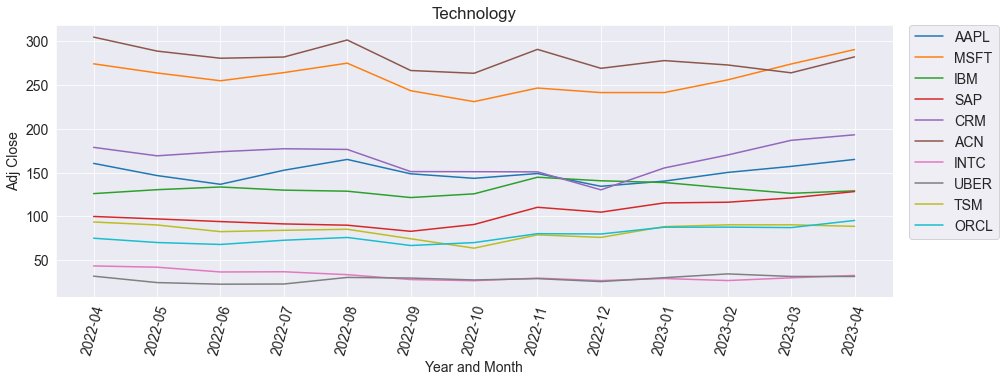

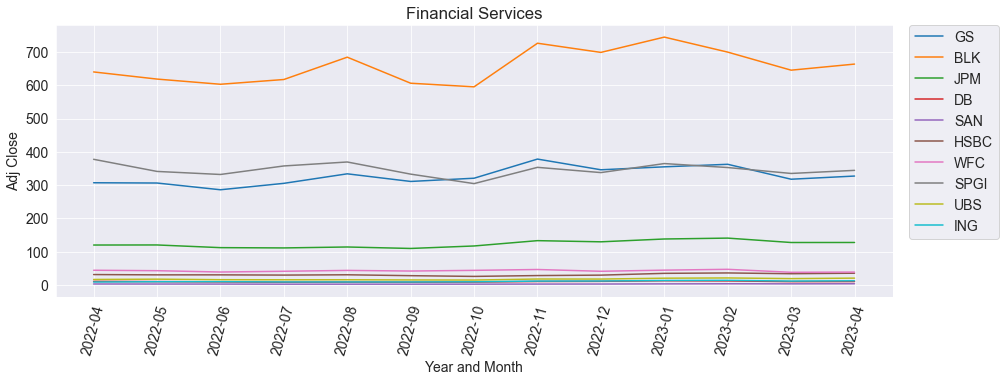

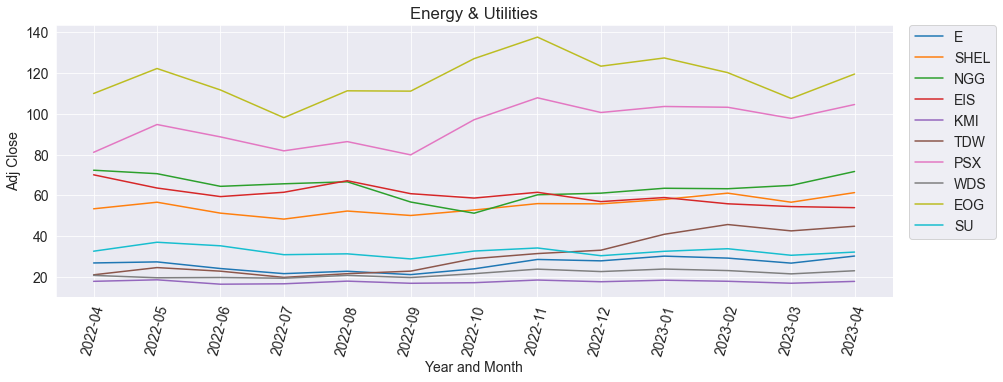

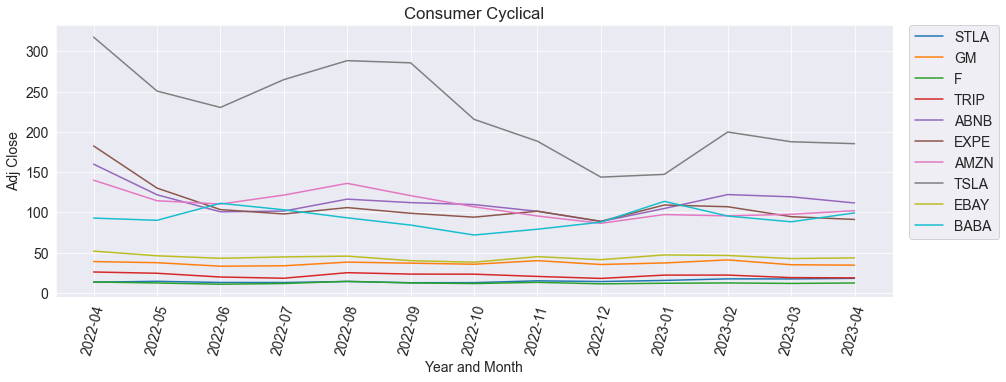

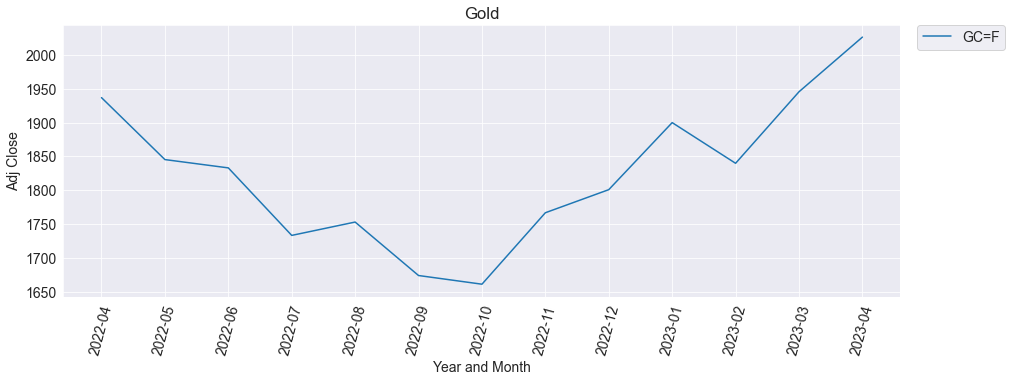

In [3]:
for s in companies_df.Sector.unique():
    sns.lineplot(data=companies_df[companies_df.Sector == s], x='Year_Month', 
                y='adjclose', hue='Company', ci=None)
    plt.title(s)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.ylabel('Adj Close') 
    plt.xlabel('Year and Month')
    plt.xticks(rotation=75)
    plt.show()

Storing the dataframe with the new columns. 

In [99]:
companies_df.to_csv('dissertation_companies.csv', index=None)

Which was the average price for each sector?

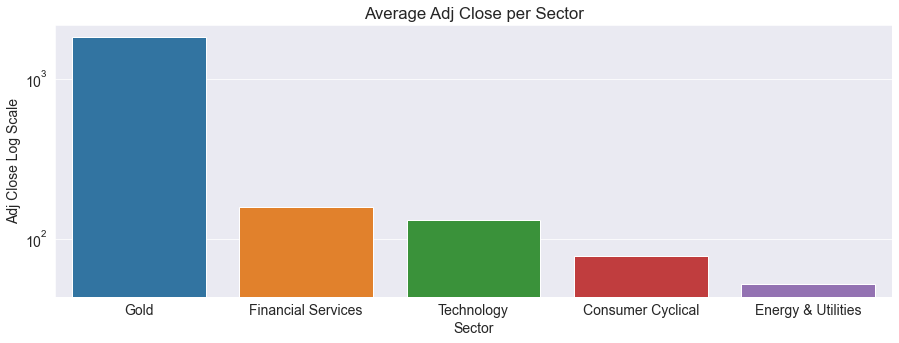

In [4]:
sector_mean_order = companies_df.groupby('Sector', as_index=False).adjclose.mean().sort_values('adjclose', ascending=False)['Sector'] 

sns.barplot(data=companies_df.groupby('Sector', as_index=False).adjclose.mean(),
            x='Sector', 
            y='adjclose', 
            order=sector_mean_order,
            )
plt.yscale('log')
plt.title('Average Adj Close per Sector') 
plt.ylabel('Adj Close Log Scale');

It is better to keep the y-axis on a log scale in order to obtain a better view of the results. 

To compare the variation of each sector, it is necessary to compute the coefficients of variation.

Standard deviations.

In [9]:
adj_close_std = companies_df.groupby('Sector', as_index=False).adjclose.std().sort_values('adjclose', ascending=False).rename(columns={'adjclose':'adjclose_std'})
adj_close_std

,Sector,adjclose_std
2,Financial Services,209.067384
3,Gold,101.717501
4,Technology,82.133885
0,Consumer Cyclical,65.649733
1,Energy & Utilities,32.310573


Means.

In [10]:
adj_close_mean = companies_df.groupby('Sector', as_index=False).adjclose.mean().sort_values('adjclose', ascending=False).rename(columns={'adjclose':'adjclose_mean'})
adj_close_mean

,Sector,adjclose_mean
3,Gold,1812.015100
2,Financial Services,156.956059
4,Technology,130.528282
0,Consumer Cyclical,77.609913
1,Energy & Utilities,51.842329


Merging them.

In [12]:
adj_close_var = adj_close_std.merge(adj_close_mean, on='Sector') 
adj_close_var

,Sector,adjclose_std,adjclose_mean
0,Financial Services,209.067384,156.956059
1,Gold,101.717501,1812.015100
2,Technology,82.133885,130.528282
3,Consumer Cyclical,65.649733,77.609913
4,Energy & Utilities,32.310573,51.842329


Coefficient of Variation Ratio: 

CV = std / mean

In [14]:
adj_close_var['adjclose_cv'] = adj_close_var['adjclose_std'] / adj_close_var['adjclose_mean']
adj_close_var

,Sector,adjclose_std,adjclose_mean,adjclose_cv
0,Financial Services,209.067384,156.956059,1.332012
1,Gold,101.717501,1812.015100,0.056135
2,Technology,82.133885,130.528282,0.629242
3,Consumer Cyclical,65.649733,77.609913,0.845894
4,Energy & Utilities,32.310573,51.842329,0.623247


Plotting the coefficients of variation.

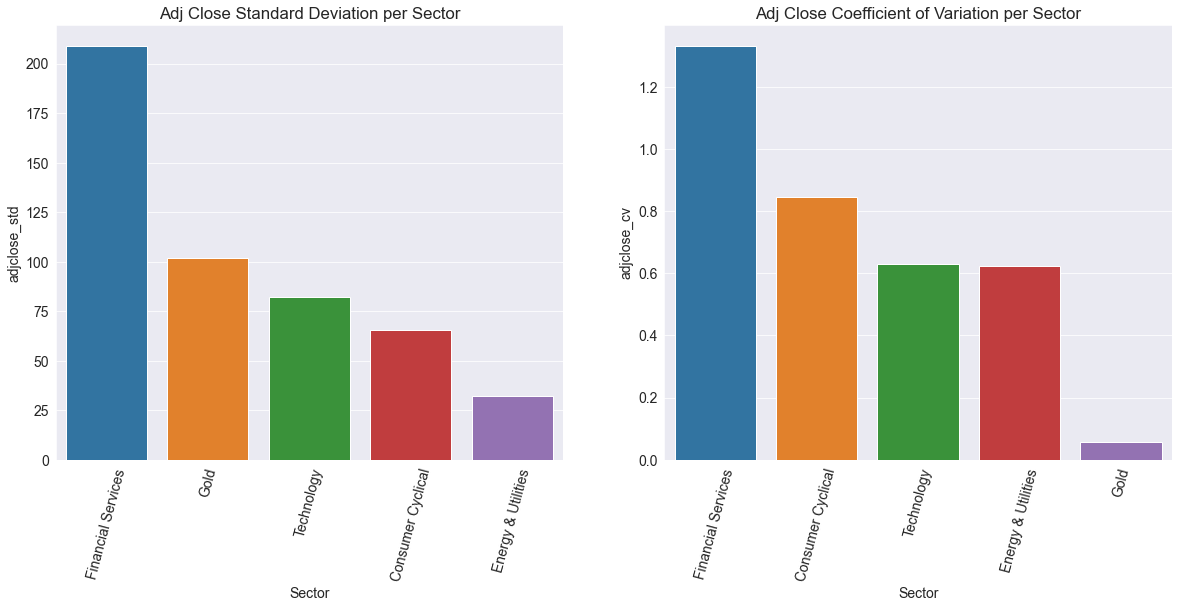

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20,8)) 

ax[0].set_title('Adj Close Standard Deviation per Sector')
ax[0].set_xticklabels(list(adj_close_var.sort_values('adjclose_std', ascending=False).Sector), rotation=75)
sns.barplot(data=adj_close_var, x='Sector', y='adjclose_std', 
            order=adj_close_var.sort_values('adjclose_std', ascending=False).Sector,
            ax=ax[0])

ax[1].set_title('Adj Close Coefficient of Variation per Sector')
ax[1].set_xticklabels(list(adj_close_var.sort_values('adjclose_cv', ascending=False).Sector), rotation=75)
sns.barplot(data=adj_close_var, x='Sector', y='adjclose_cv', 
            order=adj_close_var.sort_values('adjclose_cv', ascending=False).Sector,
            ax=ax[1]);


## Companies' Analysis

### Coefficient of Variation 

Computing the standard deviation for each company. 

In [4]:
companies_std = companies_df.groupby('Company', as_index=False).adjclose.std().rename(columns={'adjclose':'adjclose_std'})
companies_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       41 non-null     object 
 1   adjclose_std  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


Computing the mean for each company.  

In [5]:
companies_mean = companies_df.groupby('Company', as_index=False).adjclose.mean().rename(columns={'adjclose':'adjclose_mean'})
companies_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        41 non-null     object 
 1   adjclose_mean  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


Merging the two dataframes.

In [6]:
companies_std_mean = companies_std.merge(companies_mean, on='Company')
companies_std_mean.head()

,Company,adjclose_std,adjclose_mean
0,AAPL,10.927279,149.171844
1,ABNB,16.735984,112.405472
2,ACN,16.753241,280.207211
3,AMZN,16.852513,109.730434
4,BABA,13.486969,92.948868


Computing the coefficient of variation.

In [7]:
companies_std_mean['adjclose_coefficient_of_variation'] = companies_std_mean.adjclose_std / companies_std_mean.adjclose_mean 
companies_std_mean.head()

,Company,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation
0,AAPL,10.927279,149.171844,0.073253
1,ABNB,16.735984,112.405472,0.148889
2,ACN,16.753241,280.207211,0.059789
3,AMZN,16.852513,109.730434,0.153581
4,BABA,13.486969,92.948868,0.145101


Showing the coefficient of variation for each company.

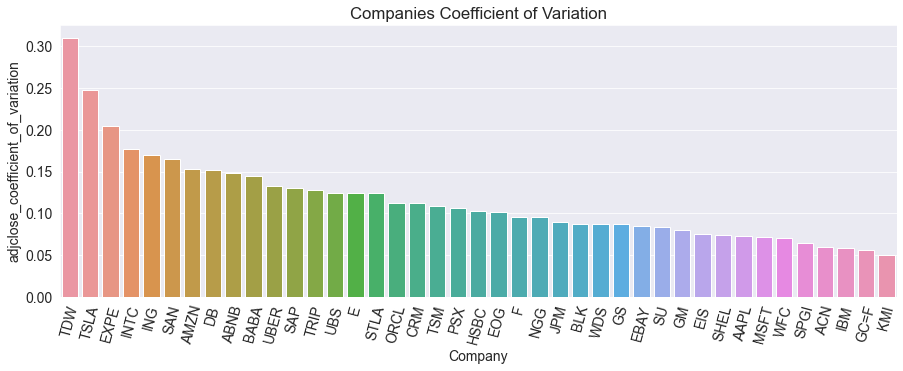

In [8]:
cv_order = companies_std_mean.sort_values('adjclose_coefficient_of_variation', ascending=False).set_index('Company').index 

sns.barplot(data=companies_std_mean, x='Company', y='adjclose_coefficient_of_variation', order=cv_order)
plt.xticks(rotation=75)
plt.title('Companies Coefficient of Variation');

### Kurtosis   

Since the Kurtosis function cannot be applied with groupby, some further steps are necessary. 

In [11]:
# Creating a separate dictionary to store the values 
kurts = {} 

# Using a for loop to store the values inside the dictionary 
for t in tickers: 
    k = companies_df[companies_df.Company == t].adjclose.kurtosis()
    kurts[t] = k 

# Storing the results into a pandas Dataframe  
kurtosis_df = pd.DataFrame([kurts], index=['adjclose_kurtosis']).T 

# Showing the result 
kurtosis_df.head()

,adjclose_kurtosis
AAPL,-0.720697
MSFT,-0.769125
IBM,-0.384639
SAP,-0.913323
CRM,-0.787655


Checking the Kurtosis for each company.

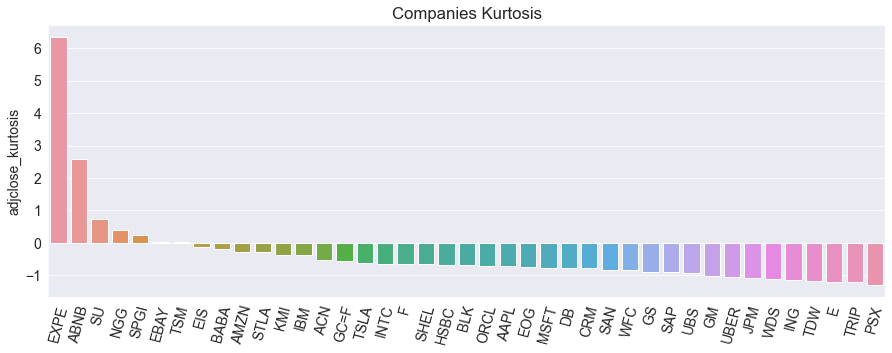

In [12]:
kurtosis_order = kurtosis_df.sort_values('adjclose_kurtosis', ascending=False).index 

sns.barplot(data=kurtosis_df, x=kurtosis_df.index, y='adjclose_kurtosis', order=kurtosis_order)
plt.xticks(rotation=75)
plt.title('Companies Kurtosis');

### Sentiment Analysis  

This is probably the longest part of the analysis. It will include two steps:  
1. Data Gathering   
2. Sentiment Analysis

Importing libraries

In [67]:
import requests 
from bs4 import BeautifulSoup 
import re

Workflow example using Apple

In [73]:
# Defining the user agent 
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'  

# Defining the URL 
comp = 'AAPL' 
url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(comp) 
request = requests.get(url, headers={'User-Agent':user_agent})

# Scraping the website 
parser = BeautifulSoup(request.text, 'html.parser') 
news_html = parser.find_all('a',{'class':'tab-link-news'})
news_html[:2]

# Selecting only the headers' texts using regular expressions
regex = "target=\"_blank\"\>(.*)\<\/a\>"
regex_news = [re.findall(regex, str(sentence)) for sentence in news_html]
regex_news[:2]  

[['What leaders are saying about the economy in the SVB aftermath: Morning Brief'],
 ['Are There Rough Waters Ahead On Tech Earnings Calendar?']]

In [78]:
# Storing news into a dictionary 
news_dict = {} 
news_list = [] 

for x in regex_news:
    news_list.append(x[0])

news_dict['Company'] = comp 
news_dict['News'] = news_list 

pd.DataFrame(news_dict).head()

,Company,News
0,AAPL,What leaders are saying about the economy in t...
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...
2,AAPL,Apple Plans iPhone Journaling App in Expansion...
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...
4,AAPL,3 Red Flags for Alphabet's Future


Now it is necessary to apply this to all the news included in the analysis. 

In [80]:
def news_gathering(company):  
    try: 
        user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'  

        comp = company
        url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(comp) 
        request = requests.get(url, headers={'User-Agent':user_agent})

        parser = BeautifulSoup(request.text, 'html.parser') 
        news_html = parser.find_all('a',{'class':'tab-link-news'})

        regex = "target=\"_blank\"\>(.*)\<\/a\>"
        regex_news = [re.findall(regex, str(sentence)) for sentence in news_html]

        news_dict={}
        news_list=[]

        for x in regex_news: 
            news_list.append(x[0])
        
        news_dict['Company'] = comp 
        news_dict['News'] = news_list

        final_news_df = pd.DataFrame(news_dict) 

        return final_news_df  
    except: 
        None 

In [82]:
# Creating an empty pandas Dataframe 
companies_news = pd.DataFrame() 

#Storing them 
for c in tickers: 
    c_news = news_gathering(c) 
    companies_news = pd.concat([companies_news, c_news]) 

# Result 
companies_news

,Company,News
0,AAPL,What leaders are saying about the economy in t...
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...
2,AAPL,Apple Plans iPhone Journaling App in Expansion...
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...
4,AAPL,3 Red Flags for Alphabet's Future
...,...,...
95,BABA,Dow Futures: Market Rally Rebounds Into Jobs R...
96,BABA,China's Alibaba invites businesses to trial AI...
97,BABA,Alibaba Touts ChatGPT Challenger Ahead of Main...
98,BABA,Why Shares of Alibaba Are Rising Today


In [86]:
companies_news = companies_news.reset_index().drop(columns='index')
companies_news

,Company,News
0,AAPL,What leaders are saying about the economy in t...
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...
2,AAPL,Apple Plans iPhone Journaling App in Expansion...
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...
4,AAPL,3 Red Flags for Alphabet's Future
...,...,...
3944,BABA,Dow Futures: Market Rally Rebounds Into Jobs R...
3945,BABA,China's Alibaba invites businesses to trial AI...
3946,BABA,Alibaba Touts ChatGPT Challenger Ahead of Main...
3947,BABA,Why Shares of Alibaba Are Rising Today


Checking missing companies.

In [88]:
for x in tickers: 
    if x not in companies_news.Company.unique():
        print(x)

GC=F


The only missing values are those about gold. This was predictable since it is not a company and news about it are not so frequent.  
Now, storing the results is necessary in order to always work with the same news. 

In [89]:
companies_news.to_csv('company_news.csv', index=None)

In [2]:
companies_news = pd.read_csv('./company_news.csv')
companies_news.head()

,Company,News,roberta_scores,rob_neg,rob_neu,rob_pos
0,AAPL,What leaders are saying about the economy in t...,"{'negative_score': 0.019849356, 'neutral_score...",0.019849,0.944306,0.035845
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...,"{'negative_score': 0.14316593, 'neutral_score'...",0.143166,0.834439,0.022395
2,AAPL,Apple Plans iPhone Journaling App in Expansion...,"{'negative_score': 0.0076362663, 'neutral_scor...",0.007636,0.728212,0.264151
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...,"{'negative_score': 0.37146127, 'neutral_score'...",0.371461,0.556915,0.071623
4,AAPL,3 Red Flags for Alphabet's Future,"{'negative_score': 0.0047791433, 'neutral_scor...",0.004779,0.434086,0.561135


Performing sentiment analysis.

In [3]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax 

In [4]:
# Downloading models

pre_trained_model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model)
model = AutoModelForSequenceClassification.from_pretrained(pre_trained_model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
# Creating a function for the scores

def sentiment_scores(row):
    try: 
        # Tokenizing the text and putting it into the model 

        tokenized_text = tokenizer(row['News'], return_tensors='pt')
        model_output = model(**tokenized_text)

        # Taking only the scores from the Tensors and putting them in a NumPy array 
        
        scores = model_output[0][0].detach().numpy() 

        # Applying the Softmax function to obtain the probability distribution 

        scores = softmax(scores) 

        # Storing the results into a dictionary 

        scores_dict = {
            'negative_score':scores[0],
            'neutral_score':scores[1],
            'positive_score':scores[2] 
        }

        return scores_dict 
    except:
        return 'Text too big'

In [6]:
# Applying the function

companies_news['roberta_scores'] = companies_news.apply(sentiment_scores, axis=1) 
companies_news.head()

,Company,News,roberta_scores
0,AAPL,What leaders are saying about the economy in t...,"{'negative_score': 0.019849356, 'neutral_score..."
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...,"{'negative_score': 0.14316593, 'neutral_score'..."
2,AAPL,Apple Plans iPhone Journaling App in Expansion...,"{'negative_score': 0.0076362663, 'neutral_scor..."
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...,"{'negative_score': 0.37146127, 'neutral_score'..."
4,AAPL,3 Red Flags for Alphabet's Future,"{'negative_score': 0.0047791433, 'neutral_scor..."


In [7]:
# Creating a column for each score

scores_dict = {}  

for index, scores in zip(companies_news.index, companies_news.roberta_scores):
    scores_dict[index] = scores 

# Storing it into a dataframe 
r_scores = pd.DataFrame(scores_dict) 
r_scores.head()

,0,1,2,3,4,5,6,7,8,9,...,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948
negative_score,0.019849,0.143166,0.007636,0.371461,0.004779,0.004943,0.006268,0.062247,0.022769,0.004215,...,0.015089,0.004343,0.007203,0.008134,0.012805,0.007078,0.017477,0.007347,0.010823,0.006290
neutral_score,0.944306,0.834439,0.728212,0.556915,0.434086,0.240417,0.607561,0.853478,0.889218,0.395740,...,0.772849,0.146970,0.359004,0.399511,0.911519,0.294856,0.868089,0.937665,0.512837,0.773602
positive_score,0.035845,0.022395,0.264151,0.071623,0.561135,0.754640,0.386171,0.084275,0.088013,0.600045,...,0.212062,0.848686,0.633793,0.592354,0.075676,0.698066,0.114434,0.054988,0.476341,0.220108


In [8]:
# Transposing the dataframe 
r_scores = r_scores.T 
r_scores.head()

,negative_score,neutral_score,positive_score
0,0.019849,0.944306,0.035845
1,0.143166,0.834439,0.022395
2,0.007636,0.728212,0.264151
3,0.371461,0.556915,0.071623
4,0.004779,0.434086,0.561135


In [9]:
# Merging with the first dataframe 
companies_news = companies_news.merge(r_scores, left_index=True, right_index=True) 
companies_news.rename(columns={'negative_score':'rob_neg', 'neutral_score':'rob_neu', 'positive_score':'rob_pos'}, inplace=True) 
companies_news.head()

,Company,News,roberta_scores,rob_neg,rob_neu,rob_pos
0,AAPL,What leaders are saying about the economy in t...,"{'negative_score': 0.019849356, 'neutral_score...",0.019849,0.944306,0.035845
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...,"{'negative_score': 0.14316593, 'neutral_score'...",0.143166,0.834439,0.022395
2,AAPL,Apple Plans iPhone Journaling App in Expansion...,"{'negative_score': 0.0076362663, 'neutral_scor...",0.007636,0.728212,0.264151
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...,"{'negative_score': 0.37146127, 'neutral_score'...",0.371461,0.556915,0.071623
4,AAPL,3 Red Flags for Alphabet's Future,"{'negative_score': 0.0047791433, 'neutral_scor...",0.004779,0.434086,0.561135


In [10]:
companies_news.to_csv('company_news.csv', index=None)

Repeating the same process for finBERT.

In [6]:
pre_trained_model = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model)
model = AutoModelForSequenceClassification.from_pretrained(pre_trained_model, num_labels=3)

In [7]:
def sentiment_scores(row):
    try: 
        # Tokenizing the text and putting it into the model 

        tokenized_text = tokenizer(row['News'], return_tensors='pt')
        model_output = model(**tokenized_text)

        # Taking only the scores from the Tensors and putting them in a NumPy array 
        
        scores = model_output[0][0].detach().numpy() 

        # Applying the Softmax function to obtain the probability distribution 

        scores = softmax(scores) 

        # Storing the results into a dictionary 

        scores_dict = {
            'negative_score':scores[2],
            'neutral_score':scores[0],
            'positive_score':scores[1] 
        }

        return scores_dict 
    except:
        return 'Text too big'

In [8]:
companies_news['finbert_scores'] = companies_news.apply(sentiment_scores, axis=1) 

scores_dict = {}  

for index, scores in zip(companies_news.index, companies_news.finbert_scores):
    scores_dict[index] = scores 

 
f_scores = pd.DataFrame(scores_dict)  
f_scores = f_scores.T 

companies_news = companies_news.merge(f_scores, left_index=True, right_index=True) 
companies_news.rename(columns={'negative_score':'fin_neg', 'neutral_score':'fin_neu', 'positive_score':'fin_pos'}, inplace=True) 
companies_news.head()

,Company,News,roberta_scores,rob_neg,rob_neu,rob_pos,finbert_scores,fin_neg,fin_neu,fin_pos
0,AAPL,What leaders are saying about the economy in t...,"{'negative_score': 0.019849356, 'neutral_score...",0.019849,0.944306,0.035845,"{'negative_score': 0.0004181307, 'neutral_scor...",0.000418,0.999563,0.000019
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...,"{'negative_score': 0.14316593, 'neutral_score'...",0.143166,0.834439,0.022395,"{'negative_score': 0.00021061316, 'neutral_sco...",0.000211,0.999761,0.000028
2,AAPL,Apple Plans iPhone Journaling App in Expansion...,"{'negative_score': 0.0076362663, 'neutral_scor...",0.007636,0.728212,0.264151,"{'negative_score': 8.6331875e-06, 'neutral_sco...",0.000009,0.989234,0.010757
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...,"{'negative_score': 0.37146127, 'neutral_score'...",0.371461,0.556915,0.071623,"{'negative_score': 0.010994043, 'neutral_score...",0.010994,0.884704,0.104302
4,AAPL,3 Red Flags for Alphabet's Future,"{'negative_score': 0.0047791433, 'neutral_scor...",0.004779,0.434086,0.561135,"{'negative_score': 0.0019774495, 'neutral_scor...",0.001977,0.066884,0.931138


In [24]:
companies_news.to_csv('company_news.csv', index=None)

Now, the two dataframes with statistical measures will be merged together, while the one with sentiment analysis will be kept separate.  
This choice is due to the different scopes of them: the first two provide a more statistical component, while the third a qualitative one. 

In [19]:
companies_news = pd.read_csv('./company_news.csv')
companies_news.head()

,Company,News,roberta_scores,rob_neg,rob_neu,rob_pos,finbert_scores,fin_neg,fin_neu,fin_pos
0,AAPL,What leaders are saying about the economy in t...,"{'negative_score': 0.019849356, 'neutral_score...",0.019849,0.944306,0.035845,"{'negative_score': 0.0004181307, 'neutral_scor...",0.000418,0.999563,0.000019
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...,"{'negative_score': 0.14316593, 'neutral_score'...",0.143166,0.834439,0.022395,"{'negative_score': 0.00021061316, 'neutral_sco...",0.000211,0.999761,0.000028
2,AAPL,Apple Plans iPhone Journaling App in Expansion...,"{'negative_score': 0.0076362663, 'neutral_scor...",0.007636,0.728212,0.264151,"{'negative_score': 8.6331875e-06, 'neutral_sco...",0.000009,0.989234,0.010757
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...,"{'negative_score': 0.37146127, 'neutral_score'...",0.371461,0.556915,0.071623,"{'negative_score': 0.010994043, 'neutral_score...",0.010994,0.884704,0.104302
4,AAPL,3 Red Flags for Alphabet's Future,"{'negative_score': 0.0047791433, 'neutral_scor...",0.004779,0.434086,0.561135,"{'negative_score': 0.0019774495, 'neutral_scor...",0.001977,0.066884,0.931138


In [13]:
final_df = companies_std_mean.merge(kurtosis_df.reset_index().rename(columns={'index':'Company'}), on='Company') 
final_df.head()

,Company,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation,adjclose_kurtosis
0,AAPL,10.927279,149.171844,0.073253,-0.720697
1,ABNB,16.735984,112.405472,0.148889,2.570167
2,ACN,16.753241,280.207211,0.059789,-0.513579
3,AMZN,16.852513,109.730434,0.153581,-0.286615
4,BABA,13.486969,92.948868,0.145101,-0.184827


Storing it.

In [14]:
final_df.to_csv('final_df.csv', index=None)

Is there a relationship between the coefficient of variation and the Kurtosis? 

In [15]:
final_df.corr(numeric_only=True)

,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation,adjclose_kurtosis
adjclose_std,1.000000,0.917284,-0.007363,0.088635
adjclose_mean,0.917284,1.000000,-0.244189,-0.004331
adjclose_coefficient_of_variation,-0.007363,-0.244189,1.000000,0.174083
adjclose_kurtosis,0.088635,-0.004331,0.174083,1.000000


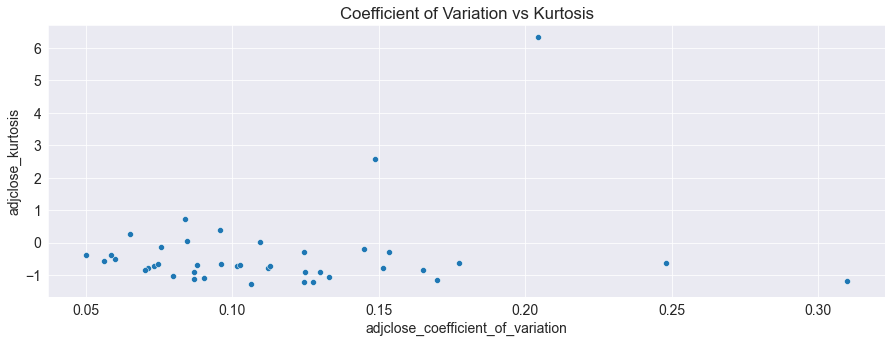

In [16]:
sns.scatterplot(data=final_df, x='adjclose_coefficient_of_variation', y='adjclose_kurtosis')
plt.title('Coefficient of Variation vs Kurtosis');

The graph confirms that the relationship between the two indicators is not high. 

### Clustering Companies using Coefficient of Variation and Kurtosis  

To define which companies are riskier, it is possible to try a clustering approach to define them. 

In [19]:
final_df = pd.read_csv('./final_df.csv')
final_df.head()

,Company,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation,adjclose_kurtosis
0,AAPL,10.927279,149.171844,0.073253,-0.720697
1,ABNB,16.735984,112.405472,0.148889,2.570167
2,ACN,16.753241,280.207211,0.059789,-0.513579
3,AMZN,16.852513,109.730434,0.153581,-0.286615
4,BABA,13.486969,92.948868,0.145101,-0.184827


In [3]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 

Before performing clustering, it is necessary to put data on the same scale. 

In [4]:
cols_to_scale = ['adjclose_coefficient_of_variation', 'adjclose_kurtosis'] 

scaler = MinMaxScaler(feature_range=(-1,1)).fit(final_df[cols_to_scale])

final_df[cols_to_scale] = scaler.transform(final_df[cols_to_scale]) 

Checking the result, the two columns should be in a range of -1 and 1. 

In [5]:
final_df.describe().loc[['min', 'max']]

,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation,adjclose_kurtosis
min,0.485524,2.942906,-1.0,-1.0
max,101.717501,1812.015100,1.0,1.0


All the values have been put on the same scale. 

In [6]:
# Defining cluster inputs 
X = final_df[cols_to_scale] 

#Defining and fitting the model 
model = KMeans(n_clusters=4, random_state=42) 
model.fit(X) 

#Making predictions 
preds = model.predict(X) 

In [7]:
final_df['Cluster'] = preds 
final_df.head()

,Company,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation,adjclose_kurtosis,Cluster
0,AAPL,10.927279,149.171844,-0.822164,-0.851838,0
1,ABNB,16.735984,112.405472,-0.240098,0.012462,3
2,ACN,16.753241,280.207211,-0.925779,-0.797442,0
3,AMZN,16.852513,109.730434,-0.203993,-0.737833,2
4,BABA,13.486969,92.948868,-0.269252,-0.711099,2


Plotting the final result. 

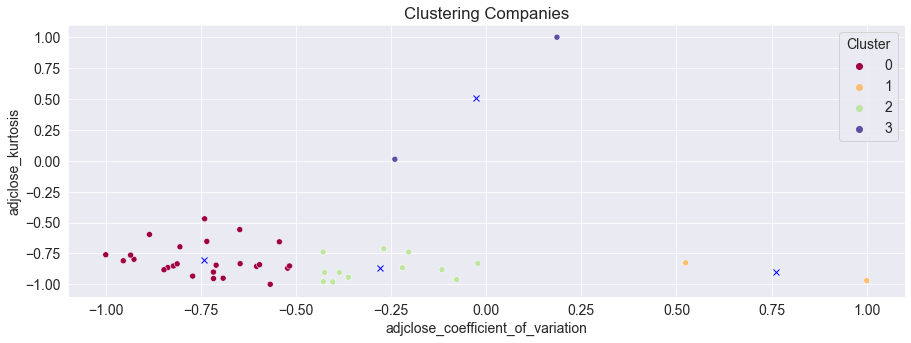

In [8]:
sns.scatterplot(data=final_df, x='adjclose_coefficient_of_variation', y='adjclose_kurtosis', hue='Cluster', palette='Spectral') 
plt.title('Clustering Companies')


# Plotting the centers 
x_center, y_center = model.cluster_centers_[:,0], model.cluster_centers_[:,1] 
plt.plot(x_center, y_center, 'xb');

Companies in cluster 1 and 3.

In [71]:
final_df[(final_df.Cluster == 1) | (final_df.Cluster == 3)]

,Company,adjclose_std,adjclose_mean,adjclose_coefficient_of_variation,adjclose_kurtosis,Cluster
1,ABNB,16.735984,112.405472,-0.240098,0.012462,3
12,EXPE,21.977374,107.600188,0.185936,1.000000,3
33,TDW,9.377761,30.247547,1.000000,-0.970291,1
35,TSLA,55.466699,223.465660,0.524241,-0.825570,1


### Sentiment Analysis EDA

In [74]:
companies_news = pd.read_csv('./company_news.csv')
companies_news.head()

,Company,News,roberta_scores,rob_neg,rob_neu,rob_pos,finbert_scores,fin_neg,fin_neu,fin_pos
0,AAPL,What leaders are saying about the economy in t...,"{'negative_score': 0.019849356, 'neutral_score...",0.019849,0.944306,0.035845,"{'negative_score': 0.0004181307, 'neutral_scor...",0.000418,0.999563,0.000019
1,AAPL,Are There Rough Waters Ahead On Tech Earnings ...,"{'negative_score': 0.14316593, 'neutral_score'...",0.143166,0.834439,0.022395,"{'negative_score': 0.00021061316, 'neutral_sco...",0.000211,0.999761,0.000028
2,AAPL,Apple Plans iPhone Journaling App in Expansion...,"{'negative_score': 0.0076362663, 'neutral_scor...",0.007636,0.728212,0.264151,"{'negative_score': 8.6331875e-06, 'neutral_sco...",0.000009,0.989234,0.010757
3,AAPL,Apple Pays Long Road to Paying Off Is Getting ...,"{'negative_score': 0.37146127, 'neutral_score'...",0.371461,0.556915,0.071623,"{'negative_score': 0.010994043, 'neutral_score...",0.010994,0.884704,0.104302
4,AAPL,3 Red Flags for Alphabet's Future,"{'negative_score': 0.0047791433, 'neutral_scor...",0.004779,0.434086,0.561135,"{'negative_score': 0.0019774495, 'neutral_scor...",0.001977,0.066884,0.931138


Comparing the two models' results. 

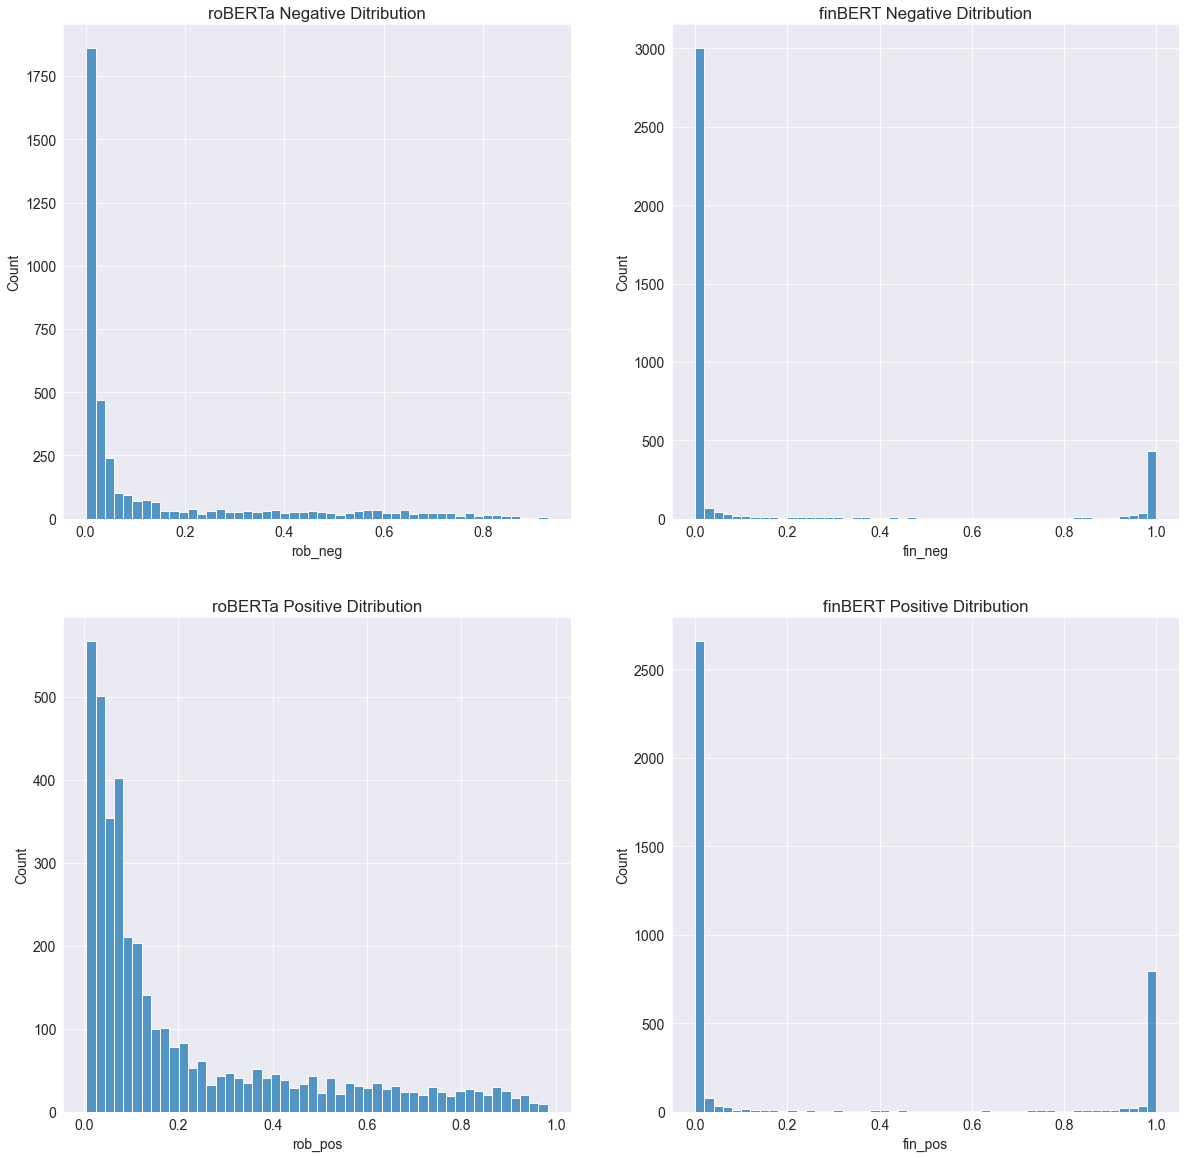

In [59]:
fig, ax = plt.subplots(2,2, figsize=(20,20)) 

ax[0,0].set_title('roBERTa Negative Ditribution') 
sns.histplot(data=companies_news, x='rob_neg', bins=50 ,ax=ax[0,0]) 

ax[0,1].set_title('finBERT Negative Ditribution') 
sns.histplot(data=companies_news, x='fin_neg', bins=50 ,ax=ax[0,1])

ax[1,0].set_title('roBERTa Positive Ditribution') 
sns.histplot(data=companies_news, x='rob_pos', bins=50 ,ax=ax[1,0]) 

ax[1,1].set_title('finBERT Positive Ditribution') 
sns.histplot(data=companies_news, x='fin_pos', bins=50 ,ax=ax[1,1]);

Negative news examples. 

In [68]:
companies_news[companies_news.fin_pos > 0.9].sample(10)

,Company,News,roberta_scores,rob_neg,rob_neu,rob_pos,finbert_scores,fin_neg,fin_neu,fin_pos
3497,EXPE,Upgraded Broker Ratings Make These 3 Stocks Wo...,"{'negative_score': 0.0044745845, 'neutral_scor...",0.004475,0.269564,0.725962,"{'negative_score': 0.00025005874, 'neutral_sco...",2.500587e-04,9.996657e-03,0.989753
462,CRM,Best Stock to Buy: Amazon vs. Salesforce,"{'negative_score': 0.0067111086, 'neutral_scor...",0.006711,0.288374,0.704915,"{'negative_score': 1.3635886e-07, 'neutral_sco...",1.363589e-07,8.738730e-07,0.999999
1601,WFC,"American Express CEO: Analysts got it wrong, w...","{'negative_score': 0.4613102, 'neutral_score':...",0.461310,0.402953,0.135737,"{'negative_score': 5.441724e-07, 'neutral_scor...",5.441724e-07,2.678798e-07,0.999999
3356,ABNB,Heres Why Airbnb (ABNB) Outperformed in Q1,"{'negative_score': 0.0923158, 'neutral_score':...",0.092316,0.794112,0.113572,"{'negative_score': 1.995534e-05, 'neutral_scor...",1.995534e-05,4.182898e-06,0.999976
1340,DB,Recent 3.5% pullback isn't enough to hurt long...,"{'negative_score': 0.21342348, 'neutral_score'...",0.213423,0.529151,0.257425,"{'negative_score': 0.0021576928, 'neutral_scor...",2.157693e-03,2.116193e-03,0.995726
2918,SU,12 Cheap Energy Stocks To Buy,"{'negative_score': 0.09446088, 'neutral_score'...",0.094461,0.784327,0.121212,"{'negative_score': 7.2964885e-06, 'neutral_sco...",7.296488e-06,2.473063e-06,0.999990
2080,E,An Oil Rebound in Libya Rests on Shaky Politic...,"{'negative_score': 0.61336035, 'neutral_score'...",0.613360,0.375773,0.010866,"{'negative_score': 0.0020843009, 'neutral_scor...",2.084301e-03,7.972034e-03,0.989944
3133,GM,This Dirty Little Secret Could Mean Major Upsi...,"{'negative_score': 0.87303185, 'neutral_score'...",0.873032,0.119659,0.007309,"{'negative_score': 2.713765e-07, 'neutral_scor...",2.713765e-07,3.937142e-07,0.999999
3932,BABA,Why Alibaba Stock Jumped 16% in March,"{'negative_score': 0.006142731, 'neutral_score...",0.006143,0.166419,0.827439,"{'negative_score': 1.2941336e-05, 'neutral_sco...",1.294134e-05,1.462978e-03,0.998524
476,CRM,Is It Worth Investing in Salesforce.com (CRM) ...,"{'negative_score': 0.37581527, 'neutral_score'...",0.375815,0.590104,0.034081,"{'negative_score': 4.9788625e-08, 'neutral_sco...",4.978862e-08,6.309882e-08,1.000000


Evaluating the four companies from cluster 1 and 3. 

In [76]:
# Defining a function for assigning the positive and negative label 
def pos_label(row): 
    if row['rob_pos'] >= 0.8 and row['fin_pos'] >= 0.8: 
        return 'Positive' 
    else:
        return 'Not Positive'

In [94]:
#Creating a dataframe with only the companies from cluster 1 and 3 
cl_one_three = companies_news[companies_news.Company.isin(final_df[(final_df.Cluster == 1) | (final_df.Cluster == 3)].Company.unique())]

#Applying the function  
cl_one_three['Evaluation'] = cl_one_three.apply(pos_label, axis=1)

In [101]:
pos_count = cl_one_three.groupby('Company', as_index=False).Evaluation.value_counts()

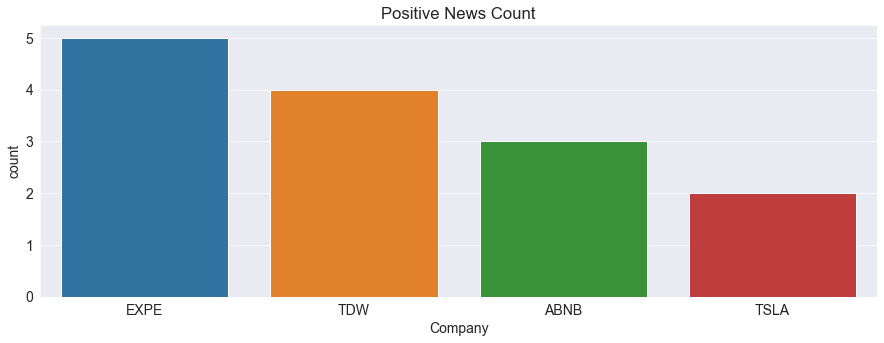

In [119]:
sns.barplot(data=pos_count[pos_count.Evaluation == 'Positive'], x='Company', y='count', ci=None,
            order = pos_count[pos_count.Evaluation == 'Positive'].sort_values('count', ascending=False).Company)
plt.title('Positive News Count');

# Conclusion  

This part of the analysis has been crucial to determine different stocks' risk and to have a better understanding of the general situation.  
In general, many improvements can be performed, starting from the way in which identifying companies' volatility for example.  
However, it can be considered a good starting point for future development.